<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 3: Linear Regression and KNN - Train/Test Split

---

# Introduction

To evaluate how our models would perform on new data, we split our data into a training set and a test set, train only on the training set, and evaluate on the test set. In $k$-fold cross validation we repeat this process $k$ times, using a different subset of our data as the test set each time.

We use this process to compare multiple models on the same data set. Those models could be variations on a single type (e.g. linear regression models with and without a particular feature), or they could be of completely different types.

Recall that k-fold cross-validation creates a hold portion of your data set for each iteration of training and validating:

![](http://i.imgur.com/0PFrPXJ.png)

## Linear Regression Practice

In this given task, you will be asked to model the median home price of various houses across U.S. Census tracts in the city of Boston.

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns #import Seaborn
from sklearn.datasets import load_boston


boston = load_boston()

X = pd.DataFrame(boston.data,
                 columns=boston.feature_names)
y = pd.DataFrame(boston.target,
                 columns=['MEDV'])

print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
boston = pd.merge(X,y, left_index=True, right_index=True) #join the two data frames to make on boston set I can explore everything with. We will still uset the X and y designations for later work.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


- Clean Up Data and Perform Exporatory Data Analysis

Boston data is from scikit-learn, so it ought to be pretty clean, but we should always perform exploratory data analysis.

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot)
- Scatterplot of each column with median price

In [4]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston.shape

(506, 14)

In [6]:
boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [7]:
boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [9]:
boston.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

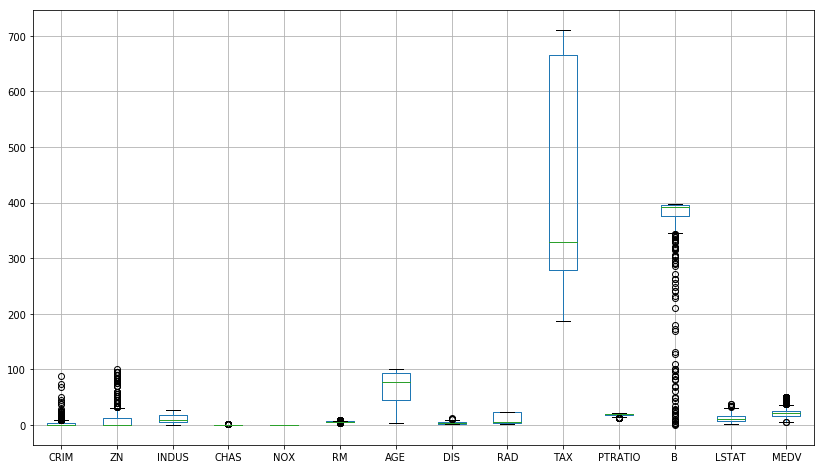

In [10]:
boston.boxplot(figsize=(14,8)) #Use a boxplot to see the general distribution of data. Not great for small numbers.

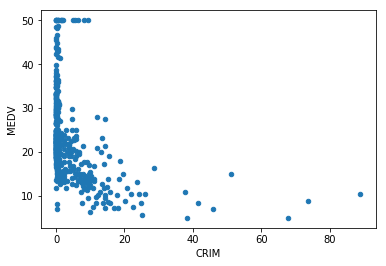

In [11]:
ax = boston.plot(kind='scatter', x='CRIM', y='MEDV')

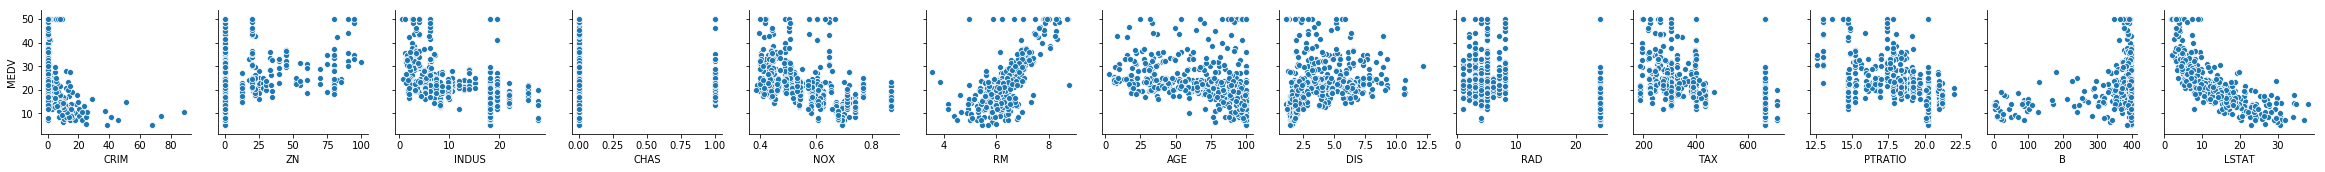

In [12]:
ax = sns.pairplot(boston,
                  x_vars=['CRIM', 'ZN','INDUS', 'CHAS', 'NOX', 'RM','AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'],
                  y_vars=['MEDV'])

- Get the MSE of a null model that simply predicts the mean value of MEDV. (You could do a train/test split here, but it won't make much difference for such a simple model.)

In [13]:
from sklearn import metrics

boston.loc[:,'MEDV_mean'] = boston.loc[:,'MEDV'].mean()

metrics.mean_squared_error(boston.loc[:,'MEDV'], boston.loc[:,'MEDV_mean']) #MSE of the Mean versus the actual

84.41955615616556

- Develop a linear regression model to predict MEDV. Train it on 70% of the data. Get its MSE on both that 70% and the other 30%.

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_medv = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=1)

lr_medv.fit(X_train, y_train) 
y_pred = lr_medv.predict(X_test)
print(metrics.mean_squared_error(y_test, y_pred)) #MSE for the first 70%

lr_medv.fit(X_test, y_test)
y_pred = lr_medv.predict(X_train)
print(metrics.mean_squared_error(y_train, y_pred)) #MSE for the second 30%

23.791624558962255
28.90724388819959


- K-fold cross-validation is slower than a simple train/test split, but it gives more reliable estimates of generalization error. Use ten-fold cross-validation to evaluate your model's MSE on both training and test data. Use this result to answer the following questions.

In [15]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 20.03991066026027
Model 2
MSE: 20.74640161849146
Model 3
MSE: 12.319956658645483
Model 4
MSE: 32.62386625262463
Model 5
MSE: 22.78563110055403
Model 6
MSE: 30.549959937634146
Model 7
MSE: 26.872121553787157
Model 8
MSE: 15.925232825279652
Model 9
MSE: 23.04103719550485
Model 10
MSE: 28.764440842992954
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 23.366855864577463


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

Comapred to the NULL model, my model performs much better. Using just the mean, the variance and bias will both be high as every new value can impact the mean with a great degree. Also, we assume that this model is highly biased as few things work out to be just the median of the values in total. This would only not be high bias if MEDV was a horizonatal line and consistent across data points.

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

Not too different from training and testing sets. Only about 20% different in total from one model to the next. This means that the variance should not be too terribly high. We cannot tell much about the BIAS in this without perhaps visualizing the data, but it, too, should not be too high.

- How much of a bias problem does your model appear to have? Why do you say that?

It would seem that with a relatively small variance in values from K-fold cross validation, all of which are still smaller than just choosing the null, mean, hypothesis, that the bias is relatively larger. Perhaps a linear model is not the best here.

- How much of a variance problem does your model appear to have? Why do you say that?

Variance is not small with changes of about 100% in some cases, but with a relatively small MSE, these are not that great.

- Add or remove variables from your model to address this problem, and get its test-set MSE using ten-fold cross validation. Did your model get better or worse? By how much?

It would seem that the RM has the most linear relationship with the MEDV, so let's just choose that and test it. It pretty much does as well alone as adding or removing any of the other columns. All had a MEAN MSE of about 23 with similar Variances.

In [16]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
X.drop(['CHAS', 'RAD', 'TAX', 'B', 'CRIM', 'LSTAT', 'PTRATIO', 'DIS', 'AGE', 'NOX', 'INDUS', 'ZN', 'CRIM'], axis=1)

from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index, :], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index, :])))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 18.813803426299742
Model 2
MSE: 23.99244300032784
Model 3
MSE: 15.148845802942828
Model 4
MSE: 23.245829103474748
Model 5
MSE: 18.889705037039697
Model 6
MSE: 25.986294369983053
Model 7
MSE: 34.816603810243464
Model 8
MSE: 29.999129786442282
Model 9
MSE: 19.99246262571479
Model 10
MSE: 22.343809993809558
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 23.322892695627797


- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

Tip: Look at scatterplots of MEDV against your column(s) before and after applying the transformation. The transformation should help if it makes the relationship more linear.

# KNN Practice

In [20]:
# Read the iris data into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris = pd.read_csv(url, header=None, names=col_names)

In [21]:
iris.head()

# Increase the default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

In [22]:
# Create a custom colormap
from matplotlib.colors import ListedColormap

cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

- Map each iris species to a number. Let's use Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 and assign the result to a column called 'species_num'.

In [23]:
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_num
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


- Clean Up Data and Perform Exporatory Data Analysis

**Items to include:**

- Data shape
- Data types
- Count of null values by column
- Basic summary statistics
- Number of unique values for each column
- Plot of the distribution of each column (e.g. histogram, bar plot, or box plot) grouped by species

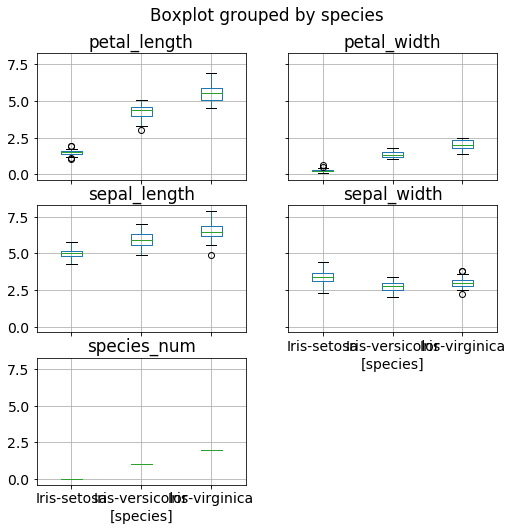

In [204]:
iris.shape;
iris.dtypes;
iris.isnull().sum();
iris.nunique()
ax = iris.boxplot(by='species', figsize=(8,8))

- Get the accuracy of a null model that simply predicts the most common species.

In [27]:
iris.groupby('species_num').count() #Since there are 50 of each, we will take the mean of them all which is then = 1
iris.loc[:,'species_mean'] = 1
iris.head()
metrics.mean_squared_error(iris.loc[:,'species_num'], iris.loc[:,'species_mean'])

0.6666666666666666

- Develop a KNN model to predict species. Use ten-fold cross-validation to evaluate your model's accuracy on both training and test data. Remember to standardize your feature variables!

In [37]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'] #Features
X = iris.loc[:,features]
y = iris.loc[:,'species_num']

from sklearn.preprocessing import StandardScaler #Import scaling before we use them below
scaler = StandardScaler()

from sklearn.neighbors import KNeighborsClassifier #Import KNN 

from sklearn.model_selection import KFold #For cross-validation
kf = KFold(n_splits=10, shuffle=True)
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    
    scaler.fit(X) #Fitting the whole feature set
    X_train_std = scaler.transform(X.iloc[train_index, :]) #Scale the Train and Test Data
    X_test_std = scaler.transform(X.iloc[test_index, :])
    
    knn = KNeighborsClassifier(n_neighbors=100).fit(X_train_std, y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], knn.predict(X_test_std)))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.2
Model 2
MSE: 0.9333333333333333
Model 3
MSE: 0.6
Model 4
MSE: 0.13333333333333333
Model 5
MSE: 0.0
Model 6
MSE: 0.26666666666666666
Model 7
MSE: 0.4666666666666667
Model 8
MSE: 0.6
Model 9
MSE: 0.2
Model 10
MSE: 0.5333333333333333
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.39333333333333337


- How well did your model perform on the training set compared to the null model? What does this result tell you about the bias and/or variance of your model?

The model performed VERY well. Additioanlly, each Kfold did not lead to a very large MSE either (though we are only dealing with small numbers, they have been scaled).

- How well did your model perform on the test set compared to how well it performed on the training set? What does this result tell you about the bias and/or variance of your model?

With each iteration, the model performed quite well on the training set and then compared to the test set based on the MSE for each of the Kfold cross validation scores.

- Does your model appear to have more of a bias problem or more of a variance problem? Why?

Bias wouuld seem quite low, but it does seem that with each change, the change in MSE is great reltive to each of the other MSE's.

- Adjust $k$ to address this problem, and get the resulting test-set accuracy using ten-fold cross validation. Did your model get better or worse? By how much?

The more I increase K for the nearest neighbors, the greater the MSE so likely the bias increases but the variance does not.

- Plot your model's test-set accuracy across a range of $k$ values using ten-fold cross validation. Use a large enough range of $k$ values to provide reasonable assurance that making $k$ larger would not help.

Tip: Use functions and loops to avoid writing duplicate code.

In [38]:
for t in range(1,100, 10):

    kf = KFold(n_splits=10, shuffle=True)
    mse_values = []
    scores = []
    n=0

    print("~~~~ CROSS VALIDATION each fold ~~~~")
    for train_index, test_index in kf.split(X, y):
    
        scaler.fit(X) #Fitting the whole feature set
        X_train_std = scaler.transform(X.iloc[train_index, :]) #Scale the Train and Test Data
        X_test_std = scaler.transform(X.iloc[test_index, :])
    
        knn = KNeighborsClassifier(n_neighbors=t).fit(X_train_std, y.iloc[train_index])
    
        mse_values.append(metrics.mean_squared_error(y.iloc[test_index], knn.predict(X_test_std)))
    
        n += 1
    
        print('Model {}'.format(n))
        print('MSE: {}'.format(mse_values[n-1]))


    print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
    print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.06666666666666667
Model 2
MSE: 0.06666666666666667
Model 3
MSE: 0.06666666666666667
Model 4
MSE: 0.0
Model 5
MSE: 0.0
Model 6
MSE: 0.13333333333333333
Model 7
MSE: 0.06666666666666667
Model 8
MSE: 0.06666666666666667
Model 9
MSE: 0.06666666666666667
Model 10
MSE: 0.0
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.05333333333333333
~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.0
Model 2
MSE: 0.0
Model 3
MSE: 0.06666666666666667
Model 4
MSE: 0.13333333333333333
Model 5
MSE: 0.06666666666666667
Model 6
MSE: 0.06666666666666667
Model 7
MSE: 0.06666666666666667
Model 8
MSE: 0.06666666666666667
Model 9
MSE: 0.0
Model 10
MSE: 0.0
~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 0.04666666666666667
~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 0.06666666666666667
Model 2
MSE: 0.06666666666666667
Model 3
MSE: 0.0
Model 4
MSE: 0.13333333333333333
Model 5
MSE: 0.13333333333333333
Model 6
MSE: 0.0
Mod

- **Bonus:** Find a *transformation* of one of more of your feature variables that allows you to create a model that performs better on the test set than your previous model. 

Possible examples:
    - Square a column
    - Take the square root of a column
    - Take the logarithm of a column
    - Multiply two columns together

## Bonus

`scikit-learn` is the most popular machine learning library in Python, but there are alternative packages that have different strengths. 

### Example: Using the Statsmodels Formula

In [7]:
# First, format our data in a DataFrame

df = pd.DataFrame(boston.data, columns=boston.feature_names)
df.loc[:, 'MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
# Set up our new statsmodel.formula handling model
import statsmodels.formula.api as smf

# You can easily swap these out to test multiple versions/different formulas
formulas = {
    "case1": "MEDV ~ RM + LSTAT + RAD + TAX + NOX + INDUS + CRIM + ZN - 1", # - 1 = remove intercept
    "case2": "MEDV ~ NOX + RM",
    "case3": "MEDV ~ RAD + TAX"
}

model = smf.ols(formula=formulas['case1'], data=df)
result = model.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     1220.
Date:                Sun, 20 May 2018   Prob (F-statistic):          1.59e-321
Time:                        10:10:40   Log-Likelihood:                -1567.7
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     498   BIC:                             3185.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             4.9744      0.224     22.197      0.000       4.534       5.415
LSTAT         -0.5615      0.048    -11.817      0.000      -0.655      -0.468
RAD            0.2109      0.070      3.025      0.003       0.074       0.348
TAX           -0.0174      0.004     -4.267      0.000      -0.025      -0.009
NOX            4.3456      3.385      1.284      0.200      -2.305      10.997
INDUS          0.0925      0.067      1.385      0.167      -0.039       0.224
CRIM          -0.0866      0.037     -2.362      0.019      -0.159      -0.015
ZN             0.0288      0.013      2.215      0.027       0.003       0.054
==============================================================================
Omnibus:                      192.072   Durbin-Watson:                   0.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              831.634
Skew:                           1.665   Prob(JB):                    2.59e-181
Kurtosis:                       8.325   Cond. No.                     6.24e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Bonus Challenge #1:

Can you optimize your R2, selecting the best features and using either test-train split or k-folds?

### Bonus Challenge #2:

Given a combination of predictors, can you find another response variable that can be accurately predicted through the exploration of different predictors in this data set?

_Tip: Check out pairplots, coefficients, and Pearson scores._

In [ ]:
# Check out variable relations
import seaborn as sns

sns.pairplot(X);

In [ ]:
# Check out Pearson scores


### Demo: Patsy

In [9]:
import patsy

# Add response to the core DataFrame
df.loc[:, 'MEDV'] = y

In [10]:
from sklearn.model_selection import train_test_split #If you didn't import it earlier, do so now

# Easily change your variable predictors without reslicing your DataFrame
y, X = patsy.dmatrices("MEDV ~ AGE + RM", data=df, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.7)


/Users/greg/anaconda3/envs/ga/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [11]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

# Rerun your model, iteratively changing your variables and train_size from the previous cell

lm = LinearRegression()
model = lm.fit(X_train, y_train)

predictions = model.predict(X_test)
print("R^2 Score: {}".format(metrics.r2_score(y_test, predictions)))

R^2 Score: 0.40402292728493383
